# Number of Fatal Accidental Overdoses in Pittsburgh
## By: Gavin Zheng
### Dataset: [Fatal Accidental Overdoses](https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses/resource/1c59b26a-1684-4bfb-92f7-205b947530cf)

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df= pd.read_csv("fatal-overdoses.csv")
df.head()

,_id,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,7852168,2007-04-20T10:55:00,Accident,54,F,W,MO,Alprazolam,Tramadol,Trazodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15120,NaN,2007
1,7852169,2007-04-04T19:42:00,Accident,24,M,W,MO,Alprazolam,Cocaine,Codeine,Diazepam,Heroin,NaN,NaN,NaN,NaN,NaN,15045,NaN,2007
2,7852170,2007-10-06T10:35:00,Accident,15,M,W,MO,Alprazolam,Oxycodone,Tramadol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15108,NaN,2007
3,7852171,2007-11-06T13:45:00,Accident,27,M,W,MO,Alprazolam,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30733,NaN,2007
4,7852172,2007-10-24T20:12:00,Accident,57,M,W,MO,Cocaine,Codeine,Heroin,Hydrocodone,NaN,NaN,NaN,NaN,NaN,NaN,15211,NaN,2007


In [22]:
# focus on relevant columns and clean data
relevant_columns = ['manner_of_death', 'incident_zip', 'case_year']
df_filtered = df[relevant_columns].dropna()

# filter for accidents as the manner of death
df_accidents = df_filtered[df_filtered['manner_of_death'] == 'Accident']

# aggregate data by incident zip
incident_counts = df_accidents['incident_zip'].value_counts().reset_index()
incident_counts.columns = ['incident_zip', 'count']

# display the top 5 zip codes with the highest number of incidents
print(incident_counts.head())

  incident_zip  count
0        15210    360
1        15212    291
2        15136    213
3        15132    206
4        15235    190


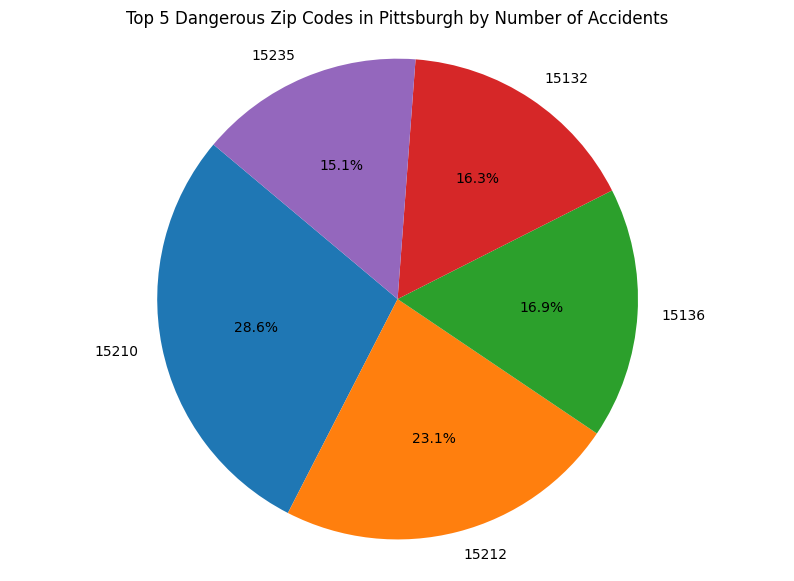

In [23]:
data_path = 'fatal-overdoses.csv'

data = pd.read_csv(data_path)

data_cleaned = data.dropna(subset=['incident_zip'])

zip_code_aggregation = data_cleaned['incident_zip'].value_counts().reset_index()


#rename 'index' to 'incident_zip' and 'incident_zip (from value count)'' becomes 'accident count'
zip_code_aggregation.columns = ['incident_zip', 'accident_count']

labels = zip_code_aggregation['incident_zip'].head()
sizes = zip_code_aggregation['accident_count'].head()


#graphing time
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Dangerous Zip Codes in Pittsburgh by Number of Accidents')
plt.axis('equal')
plt.show()


In [14]:
drug_data = data[['combined_od1']]

drug_aggregation = drug_data['combined_od1'].value_counts().reset_index()
drug_aggregation.columns = ['Drug', 'Incidents']

drug_aggregation.head()


,Drug,Incidents
0,Fentanyl,1922
1,Cocaine,1497
2,Alcohol,1042
3,Heroin,546
4,Alprazolam,498


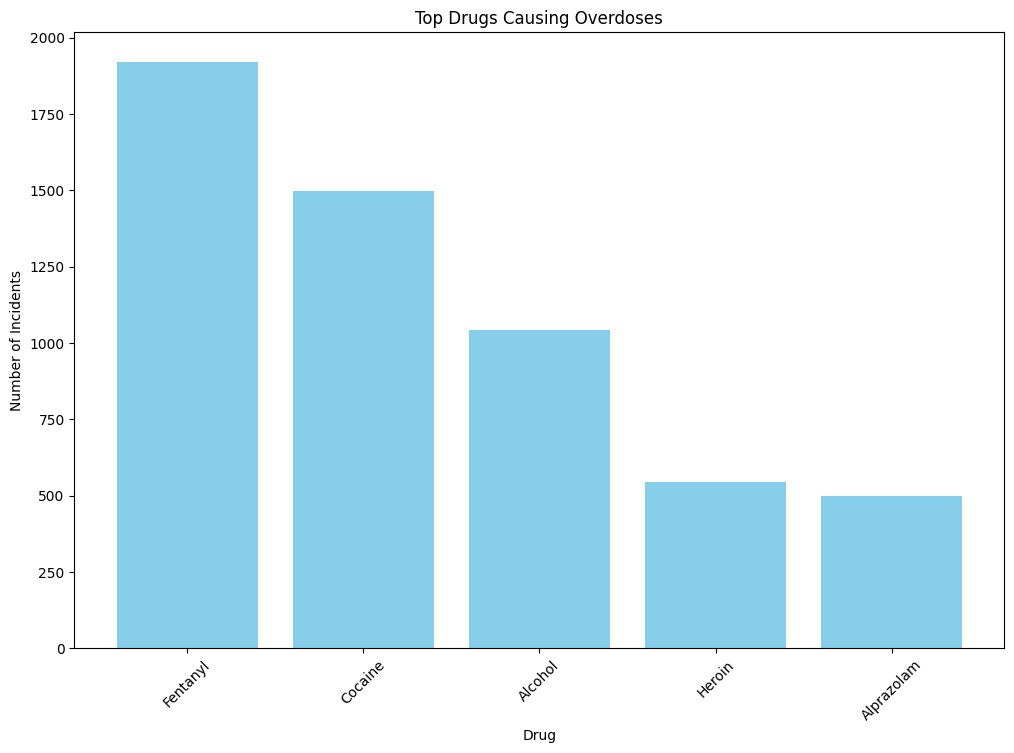

In [24]:
#bar graph time
plt.figure(figsize=(12, 8))
plt.bar(drug_aggregation['Drug'].head(), drug_aggregation['Incidents'].head(), color='skyblue')
plt.xlabel('Drug')
plt.ylabel('Number of Incidents')
plt.title('Top Drugs Causing Overdoses')
plt.xticks(rotation=45) 
plt.show()

## Metric: Number of Fatal Accidental Overdoses
### Process/Observation/Conclusions

To begin this analysis of data, I first filtered out and cleaned the columns of data that I needed. As I was counting the number of overdoses per zip code that did not prove to be difficult. I dropped all of the NA data points and disregarded age/gender/race/etc. With a particularly definitive top 5 zip codes of most overdoses, I chose to display these findings with a pie chart. The pie chart easily depicts that percentage of overdoses that they all share and is simple in conveying the percentages.

After finding out the top 5 zip codes, I did further search into what types of drugs that these people were overdosing on. By once again aggregating the type of drug and counting the frequency throughout the dataset, I was once again easily able to find the type of drug that had the most overdoses. Once again doing a top 5, the results are depicted in an easy to read bar graph. 

In our research, we decided that the number of fatal overdoses adds to the dangerous levels of an area in Pittsburgh. From this analysis, I can conclude that 15210 is the most dangerous zip code in Pittsburgh in terms of overdoses. With the top three drugs being hard drugs of fentanyl, cocaine, and alcohol, these only add to the severity. 

15210 is a zip code in Pittsburgh, Pennsylvania that covers Mount Oliver, Baldwin, and Alla Famiglia. 